In [1]:
import spotipy

from spotipy.oauth2 import SpotifyClientCredentials

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cid = '93b890e746ca4723ae3e54edbfb6651e'
secret = 'f6961a8453ee4aa2a1a3fb9da326017a'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)

sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)


In [3]:
def call_playlist(creator, playlist_id):
    
    #step1

    playlist_features_list = ["artist","album","track_name","track_id","danceability","energy","key","loudness","mode", "speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    #step2
    
    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        # Create empty dict
        playlist_features = {}
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        playlist_features["popularity"]=track["track"]["popularity"]
        playlist_features["explicit"]=track["track"]["explicit"]
        playlist_features["artist_id"]=track["track"]["album"]["artists"][0]["id"]
        
        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]
            
        genres = sp.artist(playlist_features["artist_id"])["genres"]
        if genres:
            genre_str = ','.join(genres)
            first_genre = genre_str.split(',')[0]
            playlist_features["genre"] = first_genre
        else:
            playlist_features["genre"] = ''
        
        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)

    #Step 3
        
    return playlist_df
    
    

In [4]:
plays_1970=call_playlist("spotify", "37i9dQZF1DWXQyLTHGuTIz")


In [5]:
plays_1995=call_playlist("spotify", "37i9dQZF1DXayIOFUOVODK")

In [6]:
plays_2015=call_playlist("spotify", "37i9dQZF1DX9ukdrXQLJGZ")

In [7]:
plays_2023=call_playlist("spotify", "37i9dQZF1DXcBWIGoYBM5M")

In [8]:
plays_2020=call_playlist("spotify","2fmTTbBkXi8pewbUvG3CeZ")

In [9]:
plays_1990=call_playlist("spotify","37i9dQZF1DX4joPVMjBCAo")

In [10]:
plays_1985=call_playlist("spotify","37i9dQZF1DWXZ5eJ1sVtmf")

In [11]:
plays_2005=call_playlist("spotify","37i9dQZF1DWWzQTBs5BHX9")

In [12]:
plays_2010=call_playlist("spotify","37i9dQZF1DXc6IFF23C9jj")

In [13]:
plays_1975=call_playlist("spotify","37i9dQZF1DX3TYyWu8Zk7P")

In [14]:
plays_1980=call_playlist("spotify","37i9dQZF1DWXbLOeOIhbc5")

In [15]:
y_axis=[]
y_axis.append(plays_1970["danceability"].mean())

In [16]:
y_axis.append(plays_1975["danceability"].mean())
y_axis.append(plays_1980["danceability"].mean())
y_axis.append(plays_1985["danceability"].mean())
y_axis.append(plays_1990["danceability"].mean())
y_axis.append(plays_1995["danceability"].mean())
y_axis.append(plays_2005["danceability"].mean())
y_axis.append(plays_2010["danceability"].mean())
y_axis.append(plays_2015["danceability"].mean())
y_axis.append(plays_2020["danceability"].mean())
y_axis.append(plays_2023["danceability"].mean())

In [17]:
x_axis=['1970','1975','1980','1985','1990','1995','2005','2010','2015','2020','2023']

Text(0, 0.5, 'Average Danceability of top songs')

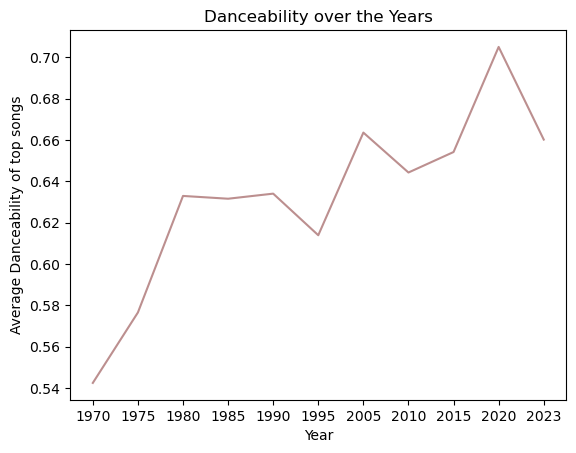

In [18]:
line_plot= plt.plot(x_axis,y_axis, color="rosybrown")
plt.title("Danceability over the Years")
plt.xlabel("Year")
plt.ylabel("Average Danceability of top songs")

In [19]:
play_1980=plays_1980.head(21)
genre80_df=play_1980["genre"].value_counts()

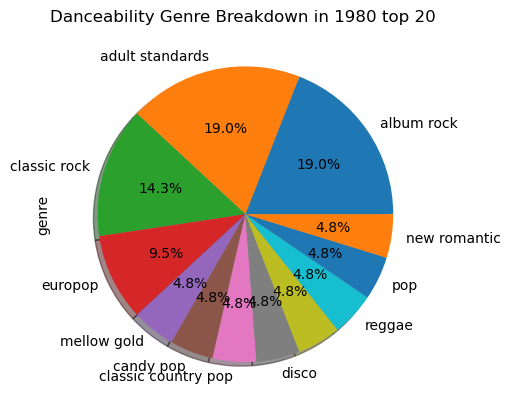

In [20]:
pie_graph80=genre80_df.plot.pie(autopct= "%1.1f%%", shadow= True,title= "Danceability Genre Breakdown in 1980 top 20 ")

In [21]:
play_2005=plays_2005.head(21)
genre05_df=play_2005["genre"].value_counts()

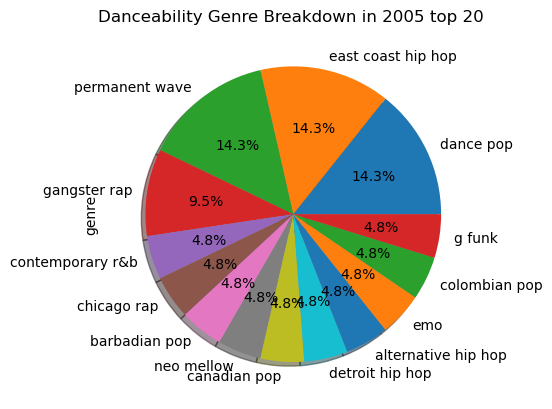

In [22]:
pie_graph05=genre05_df.plot.pie(autopct= "%1.1f%%", shadow= True,title= "Danceability Genre Breakdown in 2005 top 20 ")

In [23]:
play_2020=plays_2020.head(21)
genre20_df=play_2020["genre"].value_counts()

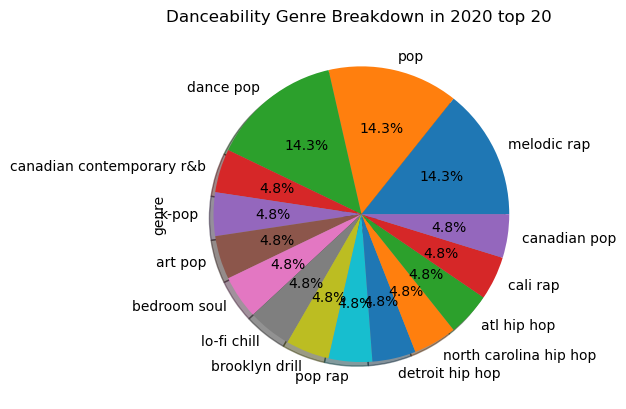

In [24]:
pie_graph20=genre20_df.plot.pie(autopct= "%1.1f%%", shadow= True,title= "Danceability Genre Breakdown in 2020 top 20 ")

In [29]:
y_axis2=[]
y_axis2.append(plays_1970["valence"].mean())
y_axis2.append(plays_1975["valence"].mean())
y_axis2.append(plays_1980["valence"].mean())
y_axis2.append(plays_1985["valence"].mean())
y_axis2.append(plays_1990["valence"].mean())
y_axis2.append(plays_1995["valence"].mean())
y_axis2.append(plays_2005["valence"].mean())
y_axis2.append(plays_2010["valence"].mean())
y_axis2.append(plays_2015["valence"].mean())
y_axis2.append(plays_2020["valence"].mean())
y_axis2.append(plays_2023["valence"].mean())

Text(0, 0.5, 'Average Valence of top songs')

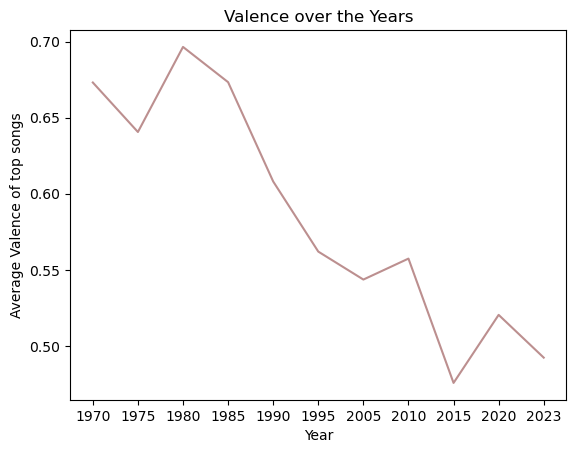

In [30]:
x_axis2=['1970','1975','1980','1985','1990','1995','2005','2010','2015','2020','2023']
line_plot= plt.plot(x_axis2,y_axis2, color="rosybrown")
plt.title("Valence over the Years")
plt.xlabel("Year")
plt.ylabel("Average Valence of top songs")

In [31]:
play_1995=plays_1995.head(21)
genre95_df=play_1995["genre"].value_counts()

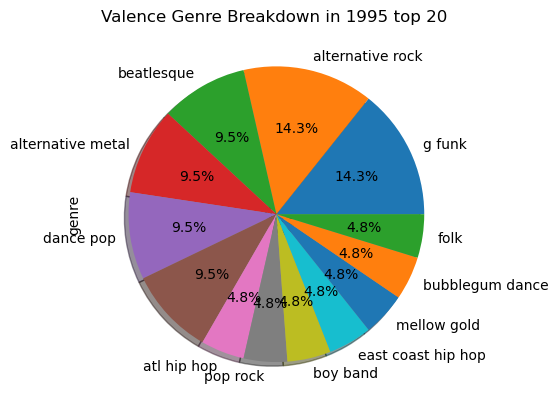

In [32]:
pie_graph95=genre95_df.plot.pie(autopct= "%1.1f%%", shadow= True,title= "Valence Genre Breakdown in 1995 top 20 ")

In [33]:
play_2015=plays_2015.head(21)
genre15_df=play_2015["genre"].value_counts()

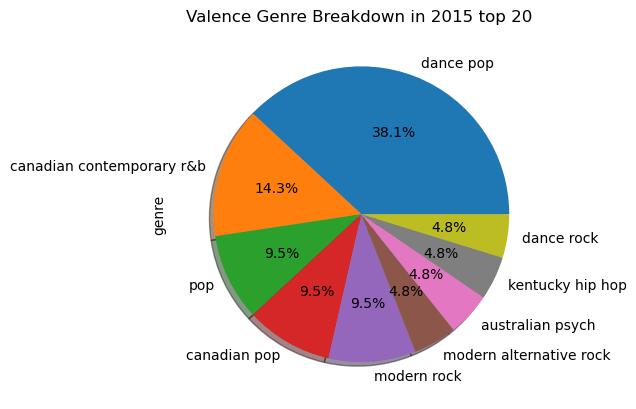

In [34]:
pie_graph15=genre15_df.plot.pie(autopct= "%1.1f%%", shadow= True,title= "Valence Genre Breakdown in 2015 top 20 ")

In [35]:
y_axis3=[]
y_axis3.append(plays_1970["speechiness"].mean())
y_axis3.append(plays_1975["speechiness"].mean())
y_axis3.append(plays_1980["speechiness"].mean())
y_axis3.append(plays_1985["speechiness"].mean())
y_axis3.append(plays_1990["speechiness"].mean())
y_axis3.append(plays_1995["speechiness"].mean())
y_axis3.append(plays_2005["speechiness"].mean())
y_axis3.append(plays_2010["speechiness"].mean())
y_axis3.append(plays_2015["speechiness"].mean())
y_axis3.append(plays_2020["speechiness"].mean())
y_axis3.append(plays_2023["speechiness"].mean())

Text(0, 0.5, 'Average speechiness of top songs')

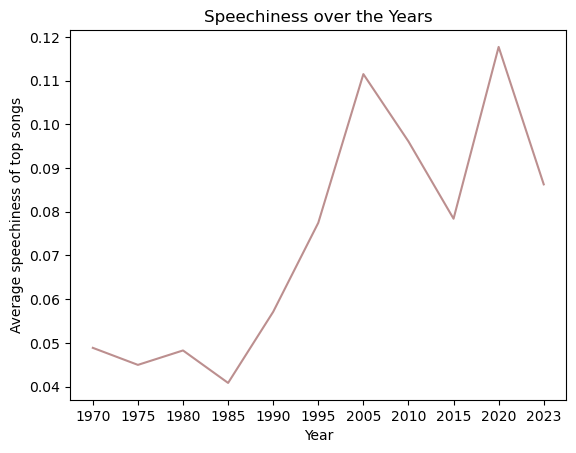

In [36]:
line_plot= plt.plot(x_axis,y_axis3, color="rosybrown")
plt.title("Speechiness over the Years")
plt.xlabel("Year")
plt.ylabel("Average speechiness of top songs")

In [37]:
play_1985=plays_1985.head(21)
genre85_df=play_1985["genre"].value_counts()

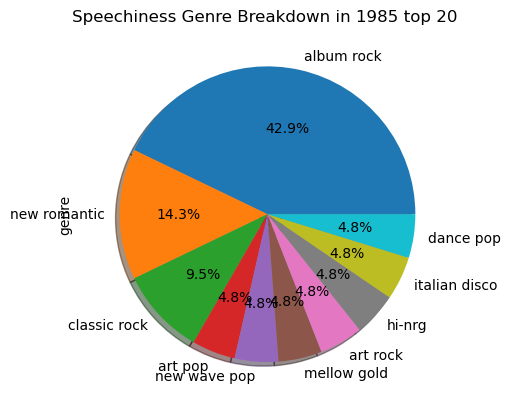

In [38]:
pie_graph85=genre85_df.plot.pie(autopct= "%1.1f%%", shadow= True,title= "Speechiness Genre Breakdown in 1985 top 20 ")

In [39]:
play_1005=plays_2005.head(21)
genre05_df=play_2005["genre"].value_counts()

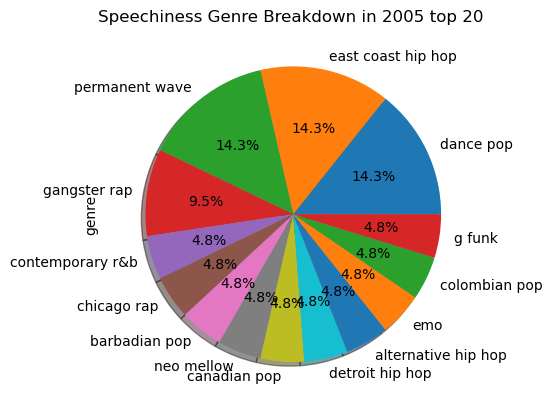

In [40]:
pie_graph05=genre05_df.plot.pie(autopct= "%1.1f%%", shadow= True,title= "Speechiness Genre Breakdown in 2005 top 20 ")

In [41]:
y_axis5=[]
y_axis5.append(plays_1970["explicit"].sum())
y_axis5.append(plays_1975["explicit"].sum())
y_axis5.append(plays_1980["explicit"].sum())
y_axis5.append(plays_1985["explicit"].sum())
y_axis5.append(plays_1990["explicit"].sum())
y_axis5.append(plays_1995["explicit"].sum())
y_axis5.append(plays_2005["explicit"].sum())
y_axis5.append(plays_2010["explicit"].sum())
y_axis5.append(plays_2015["explicit"].sum())
y_axis5.append(plays_2020["explicit"].sum())
y_axis5.append(plays_2023["explicit"].sum())

Text(0, 0.5, 'Number Explicit top songs')

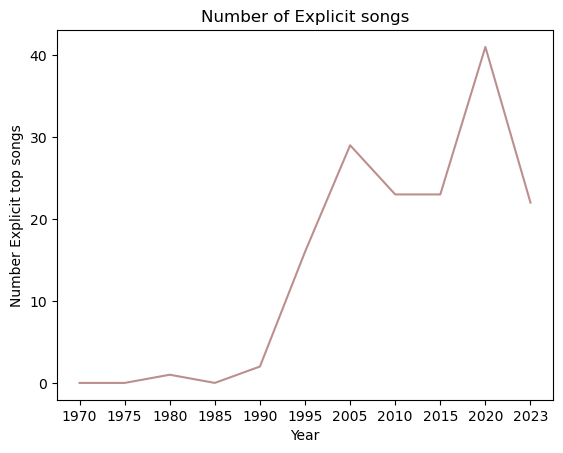

In [42]:
line_plot= plt.plot(x_axis,y_axis5, color="rosybrown")
plt.title("Number of Explicit songs")
plt.xlabel("Year")
plt.ylabel("Number Explicit top songs")

In [43]:
summary_1970=plays_1970["danceability"].agg(['mean','median','var','std','sem'])

In [44]:
summary_1975=plays_1975["danceability"].agg(['mean','median','var','std','sem'])
summary_1980=plays_1980["danceability"].agg(['mean','median','var','std','sem'])
summary_1985=plays_1985["danceability"].agg(['mean','median','var','std','sem'])
summary_1990=plays_1990["danceability"].agg(['mean','median','var','std','sem'])
summary_1995=plays_1995["danceability"].agg(['mean','median','var','std','sem'])
summary_2005=plays_2005["danceability"].agg(['mean','median','var','std','sem'])
summary_2010=plays_2010["danceability"].agg(['mean','median','var','std','sem'])
summary_2015=plays_2015["danceability"].agg(['mean','median','var','std','sem'])
summary_2020=plays_2020["danceability"].agg(['mean','median','var','std','sem'])
summary_2023=plays_2023["danceability"].agg(['mean','median','var','std','sem'])

In [45]:
df=pd.DataFrame({"1970":summary_1970,"1975":summary_1975,"1980":summary_1980,"1985":summary_1985,"1990":summary_1990,"1995":summary_1995,
                "2005":summary_2005,"2010":summary_2010,"2015":summary_2015,"2020":summary_2020,"2023":summary_2023})

In [46]:
df

,1970,1975,1980,1985,1990,1995,2005,2010,2015,2020,2023
mean,0.542470,0.576550,0.632920,0.631570,0.634030,0.613910,0.663560,0.644250,0.654160,0.705000,0.660180
median,0.548500,0.598500,0.648000,0.655500,0.656500,0.642500,0.658000,0.638000,0.654000,0.728000,0.696000
var,0.020847,0.023305,0.025669,0.017709,0.020938,0.022810,0.027368,0.015167,0.017146,0.015987,0.019911
std,0.144385,0.152659,0.160215,0.133075,0.144701,0.151030,0.165433,0.123154,0.130942,0.126439,0.141106
sem,0.014438,0.015266,0.016021,0.013308,0.014470,0.015103,0.016543,0.012315,0.013094,0.012644,0.019955


In [47]:
latin=call_playlist("spotify","37i9dQZF1DX10zKzsJ2jva")

In [48]:
latin_dance=latin["danceability"].mean()

In [49]:
latin_dance

0.7460799999999999